In [29]:
import pandas as pd
import os

## Merging 12 months of sales

In [56]:
df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('C:/Users/Admin/OneDrive/Desktop/Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/Sales_Data/" + file)
    all_months_data= pd.concat([all_months_data, df])
    
    
    all_months_data.to_csv("all_data.csv", index=False)
    
    all_months_data.head()
    
    print (df)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
18378   194090                Google Phone                1        600   
18379   194091       AA Batteries (4-pack)                1       3.84   
18380   194092      AAA Batteries (4-pack)                2       2.99   
18381   194093       AA Batteries (4-pack)                1       3.84   
18382   194094    Lightning Charging Cable                1      14.95   

           Order Date                        Purchase Address  
0      04/19/19 08:46            917 1st St, Da

## Read in updated dataframe

In [62]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning up the data

#### Drop rows with NaN

In [74]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Finding 'Or' and deleting it

In [81]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Converting Column to the correct type

In [88]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## Augmenting data with additional coloumns

#### Adding the 'month' coloumn

In [83]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a 'sales' column 

In [92]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add 'city' column

In [ ]:
#using .apply()

In [151]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data ['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+ ' ('+ get_state(x) + ') ')


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


###### Question 1: What was the best month for sales? How much was earned that month?

In [130]:
results = all_data.groupby('Month').sum()

Text(0.5, 0, 'Month number')

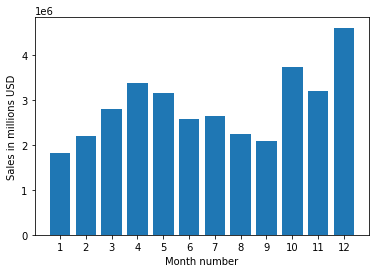

In [109]:
import matplotlib.pyplot as plt

Months = range (1,13)

plt.bar(Months, results ['Sales'])
plt.xticks(Months)
plt.ylabel('Sales in millions USD')
plt.xlabel('Month number')

#### Question 2: What city has the highest sales?

In [152]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


Text(0.5, 0, 'City Name')

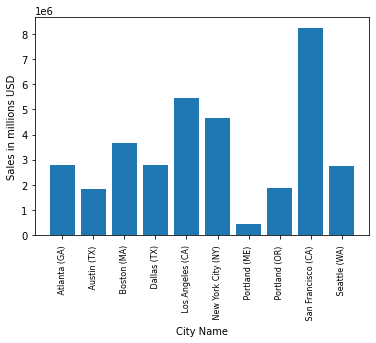

In [160]:
import matplotlib.pyplot as plt

Cities = [city for city, df in all_data.groupby('City')]

plt.bar(Cities, results ['Sales'])
plt.xticks(Cities, rotation='vertical', size=8)
plt.ylabel('Sales in millions USD')
plt.xlabel('City Name')

#### What time should we display advertisements to maximise the liklihood of customer's buying the advertised product?

In [166]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [214]:
hours = [hour for hour , df in all_data.groupby('Hour')]

plt.plot (hours, all_data.groupby(['Hour']).count(1))
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.show()

#My recommendation is around 11 am or 19:00 (7) pm 

TypeError: count() takes 1 positional argument but 2 were given

#### What products are most often sold together?

In [236]:
#Duplicate Order IDs would imply the products were sold together

df= all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(10)



C:\Users\Admin\AppData\Local\Temp\ipykernel_8904\775261510.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [242]:
#Two items most commonly sold together 

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [244]:
#3 items sold most commonly together
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
for key, value in count.most_common(10):
    print(key,value)
    

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### What product sold the most?

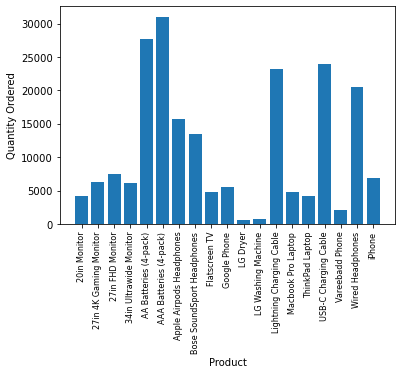

In [255]:
product_group = all_data.groupby('Product')

quantity_ordered=  product_group.sum()['Quantity Ordered']

products= [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.ylabel('Quantity Ordered')

plt.xlabel('Product')

plt.xticks(products, rotation='vertical', size=8)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8904\1688637744.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


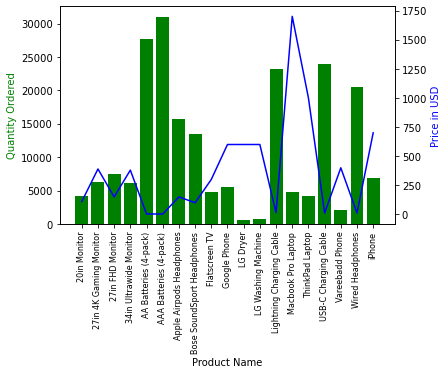

In [264]:
prices= all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='green')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in USD', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()
